In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
dataframe = pd.read_csv("Bengaluru_House_Data.csv")
dataframe.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
dataframe.shape

(13320, 9)

In [4]:
dataframe.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
dataframe.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [6]:
dataframe2 = dataframe.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')
dataframe2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Data Cleaning

In [7]:
dataframe2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
#Since the dataset values are large compare to null values rows. So we can the values from the dataset

dataframe3 = dataframe2.dropna()
dataframe3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
dataframe3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
dataframe3['bhk'] = dataframe3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\ajay2\AppData\Local\Temp\ipykernel_14176\3214187097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe3['bhk'] = dataframe3['size'].apply(lambda x: int(x.split(' ')[0]))


In [11]:
dataframe3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
dataframe3['bhk'].unique()
# dataframe3['Bedroom'] = dataframe3['size'].apply(lambda x: int(x.split(' ')[0]))

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
dataframe3[dataframe3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
 dataframe3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
dataframe3[~dataframe3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return float(tokens[0]) + float(tokens[1]) /2
    try:
        return float(x)
    except:
        return None

In [18]:
dataframe4 = dataframe3.copy()
dataframe4['total_sqft'] = dataframe4['total_sqft'].apply(convert_sqft_to_num)
dataframe4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


Feature Engineering and Dimensionality Reduction

In [19]:
dataframe5 = dataframe4.copy()
dataframe5['price_per_sqft'] = dataframe5['price']*100000 / dataframe5['total_sqft']
dataframe5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [20]:
len(dataframe5.location.unique())

1304

In [21]:
dataframe5.location = dataframe5.location.apply(lambda x: x.strip())

location_stats = dataframe5.groupby('location')['location'].agg('count').sort_values(ascending= False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [22]:
len(location_stats[location_stats<=10])

1052

In [23]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [24]:
dataframe5.location = dataframe5.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
len(dataframe5.location.unique())

242

Outlier Removal

In [25]:
dataframe5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
dataframe5[dataframe5.total_sqft/dataframe5.bhk<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [27]:
dataframe5.shape

(13246, 7)

In [28]:
dataframe6 = dataframe5[~(dataframe5.total_sqft/dataframe5.bhk<300)]
dataframe6.shape

(12502, 7)

In [29]:
dataframe6.price_per_sqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [30]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<m+sd)]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

dataframe7 = remove_pps_outlier(dataframe6)
dataframe7.shape

(10231, 7)

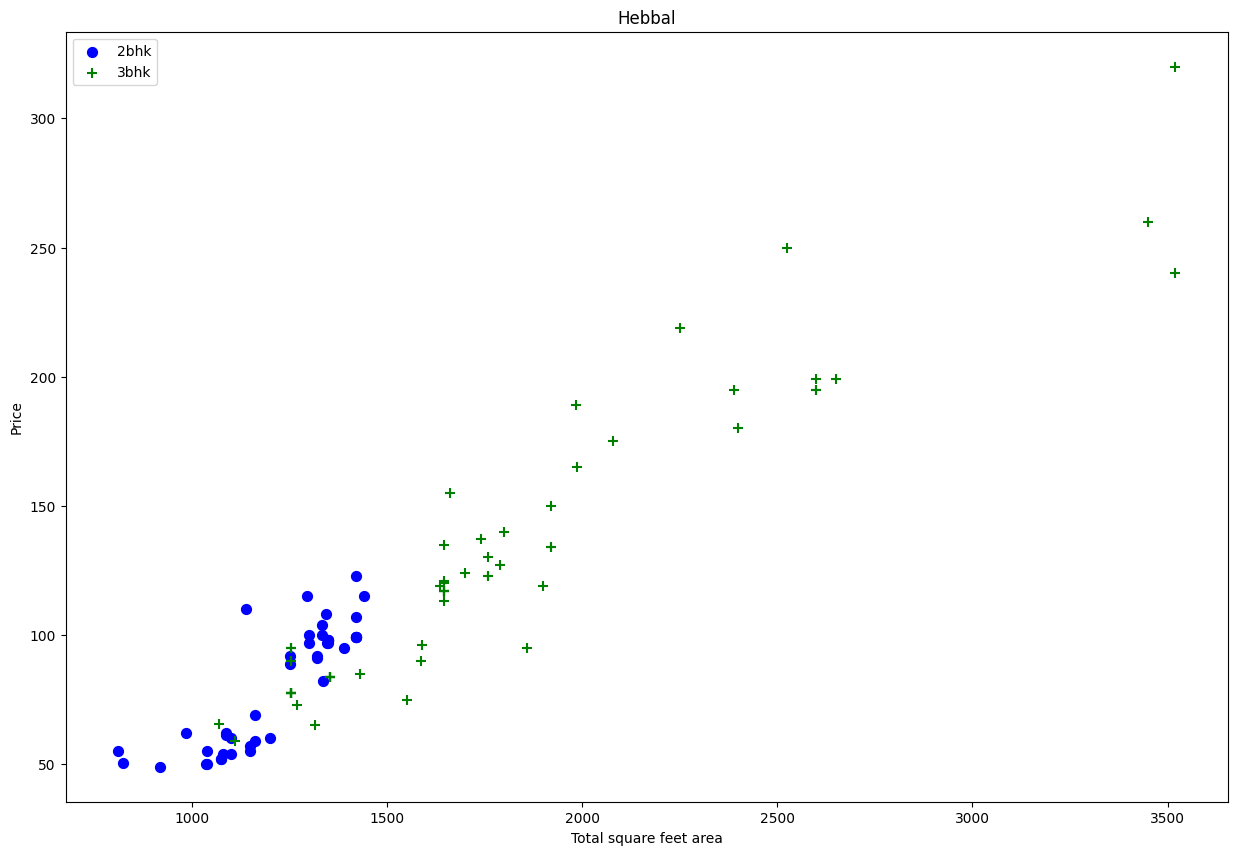

In [31]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color="blue",label="2bhk", s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='Green', label='3bhk', s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(dataframe7, 'Hebbal')

In [32]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'sd' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

dataframe8 = remove_bhk_outlier(dataframe7)
dataframe8.shape

(7326, 7)

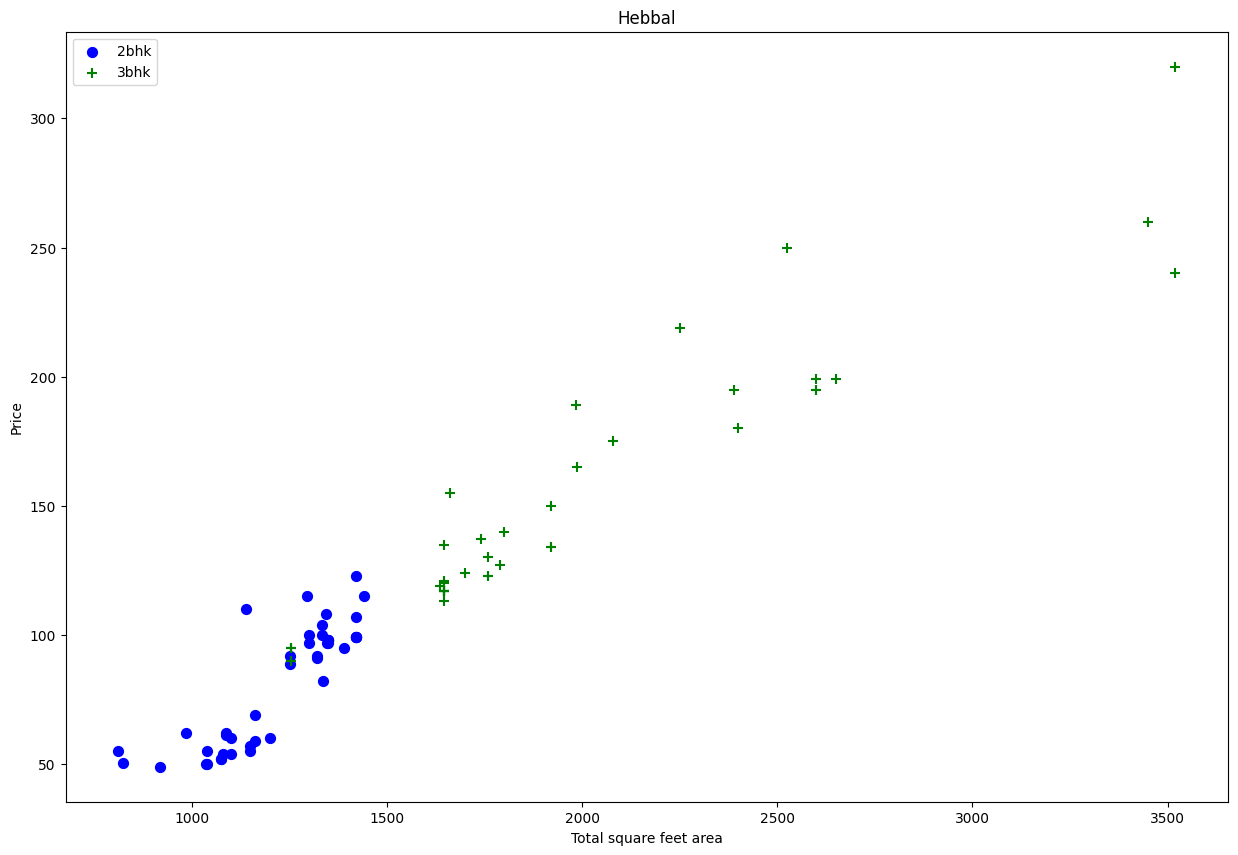

In [33]:
plot_scatter_chart(dataframe8, 'Hebbal')

Text(0, 0.5, 'count')

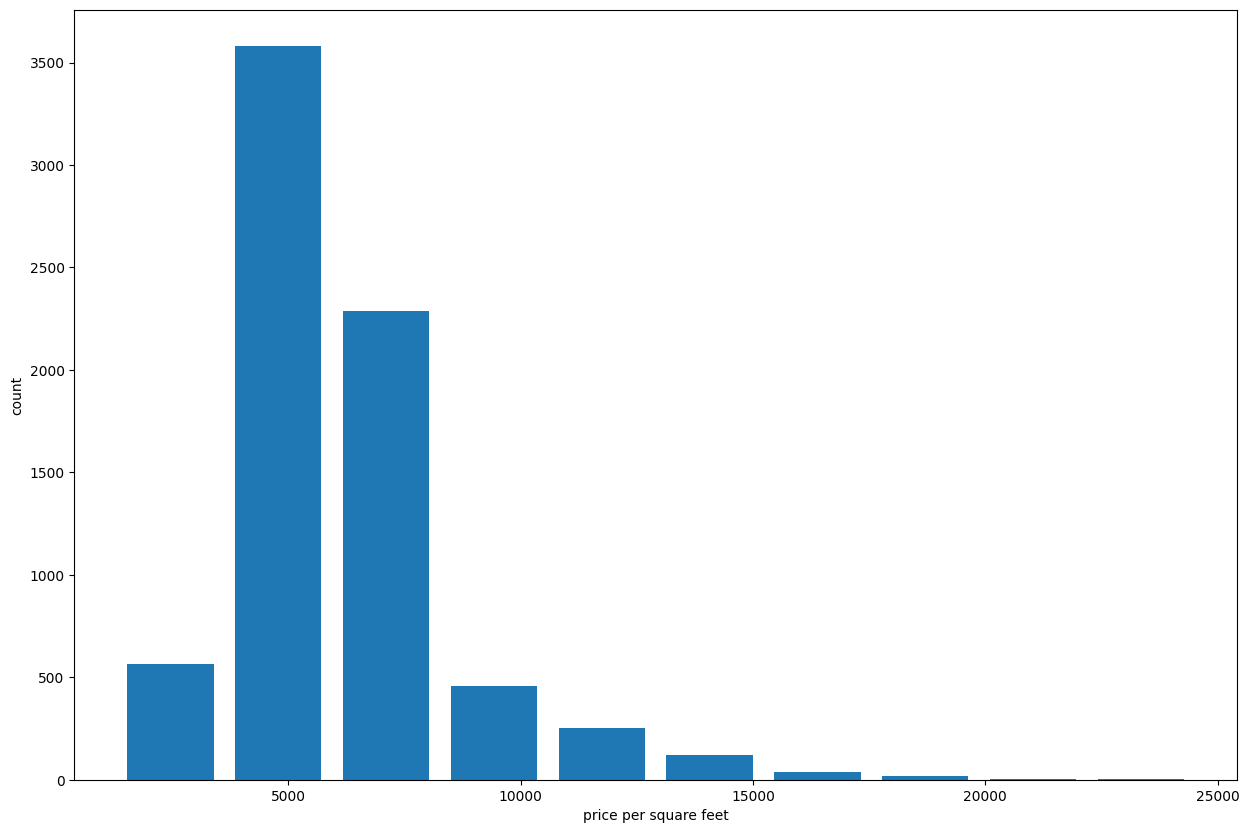

In [34]:
plt.hist(dataframe8.price_per_sqft, rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel('count')

In [35]:
dataframe8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [36]:
dataframe8[dataframe8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5273,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8476,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8565,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9298,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9629,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

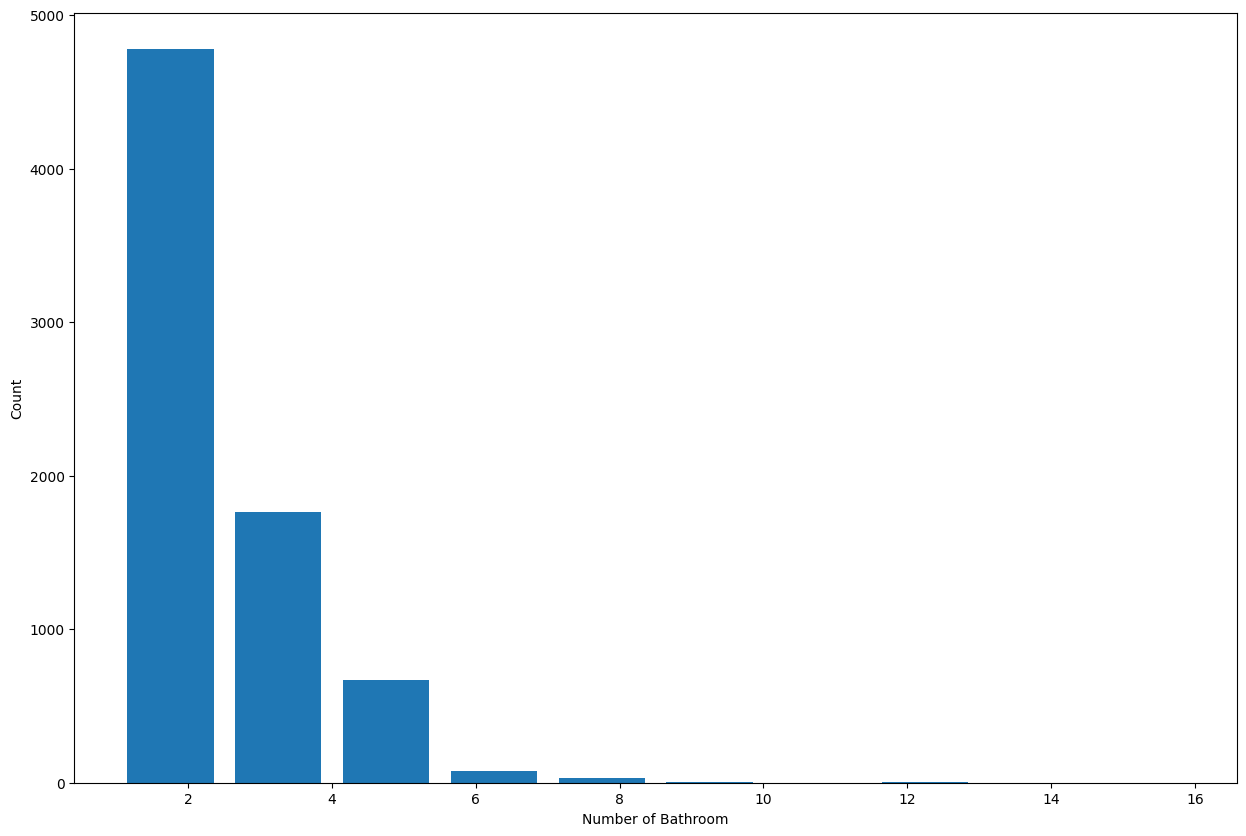

In [37]:
plt.hist(dataframe8.bath, rwidth=0.8)
plt.xlabel("Number of Bathroom")
plt.ylabel("Count")

In [38]:
dataframe8[dataframe8.bath>dataframe8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1625,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5234,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6705,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8401,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [39]:
dataframe9 = dataframe8[dataframe8.bath<dataframe8.bhk+2]
dataframe9.shape

(7252, 7)

In [40]:
dataframe10 = dataframe9.drop(['size','price_per_sqft'], axis='columns')
dataframe10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


Model Building

In [41]:
dummies = pd.get_dummies(dataframe10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
dataframe11 = pd.concat([dataframe10, dummies.drop('other', axis='columns')], axis = 'columns')
dataframe11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
dataframe12 = dataframe11.drop('location', axis='columns')
dataframe12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
dataframe12.shape

(7252, 245)

In [45]:
X = dataframe12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y = dataframe12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [48]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

LinearRegression()

In [49]:
lr_clf.score(X_test, y_test)

0.8515492485425833

In [50]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.83419256, 0.84066871, 0.85637292, 0.84326517, 0.84613103])

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [52]:
# Polynomial Regression Model
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=10)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
print(f"Polynomial Regression Test Score: {poly_model.score(X_test_poly, y_test_poly)}")

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
print("Polynomial Regression Cross Validation Scores: ", cross_val_score(poly_model, X_poly, y, cv=cv))


Polynomial Regression Test Score: -1.0477851579500874
Polynomial Regression Cross Validation Scores:  [ 7.46901410e-01  3.38880266e-01  2.94381099e-02  4.77655823e-01
 -2.27273328e+02]


In [53]:
def predict_price(location, sqft, bath, bhk, model='linear'):
    loc_index = np.where(X.columns == location)[0][0]
    sample_df = np.zeros(len(X.columns))
    sample_df[0] = sqft
    sample_df[1] = bath
    sample_df[2] = bhk
    if loc_index:
        sample_df[loc_index] = 1
    if model == 'linear':
        return lr_clf.predict([sample_df])[0]
    elif model == 'poly':
        sample_df_poly = poly_features.transform([sample_df])
        return poly_model.predict(sample_df_poly)[0]
    else:
        return "Model not recognized"


In [54]:
print(predict_price('1st Phase JP Nagar', 1000, 2, 2, model='linear'))
print(predict_price('1st Phase JP Nagar', 1000, 2, 2, model='poly'))
print(predict_price('Indira Nagar', 1000, 2, 2, model='linear'))
print(predict_price('Indira Nagar', 1000, 2, 2, model='poly'))


84.22924041832908
70.06501477956772
181.82117905154462
92.9484551846981


c:\Users\ajay2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ajay2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\ajay2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ajay2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
# Create a grid of sqft values for plotting
sqft_values = np.linspace(X['total_sqft'].min(), X['total_sqft'].max(), 100).reshape(-1, 1)

# Linear Regression Predictions
X_plot = X.copy()
X_plot['sqft_values'] = sqft_values
lr_preds = lr_clf.predict(X_plot.drop(['price'], axis=1))

# Polynomial Regression Predictions
poly_features = PolynomialFeatures(degree=2)
X_poly_plot = poly_features.fit_transform(X_plot.drop(['price'], axis=1))
poly_preds = poly_model.predict(X_poly_plot)

# Plot the data points
plt.figure(figsize=(20, 10))
plt.scatter(X['total_sqft'], y, color='blue', label='Data points')

# Plot Linear Regression line
plt.plot(sqft_values, lr_preds, color='red', label='Linear Regression')

# Plot Polynomial Regression line
plt.plot(sqft_values, poly_preds, color='green', label='Polynomial Regression (Degree 2)')

plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.title('Comparison of Linear and Polynomial Regression')
plt.legend()
plt.show()